<a href="https://colab.research.google.com/github/YangJeongA/class2022Spring/blob/main/220504%2C_0509_natural_language_processing(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization
- 긴 string을 단어 수준 등으로 분리 해주는 것

In [ ]:
import nltk

# nltk(natural language toolkit)은 artificial language의 반대말. 
# artificial language는 computer language이고 natural language는 사람의 언어. 즉, natural language라고 하면 그냥 text라고 생각하면 됨. 

####1.

In [ ]:
# copy a file from github

import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

0

In [ ]:
# read a text file in the server

file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

# 변수 text에 string으로 텍스트 가져오기

####2.

In [ ]:
# or copy/paste text here (텍스트를 직접 가져옴)

text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

###3. 
- text라는 변수에 저장돼있는 것을 파일로 만들기

In [ ]:
# write out a text file

file = open("tmp.txt", "w")
file.write(text)
file.close()

tokenization

In [ ]:
text.split()

In [ ]:
' '.join(text.split())

'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)


# punctuation까지 tokenization (from nltk.tokenize import word_tokenize 사용)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
words

# punctuation이 별개의 token으로 잡혀있는 것을 볼 수 있음

In [ ]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)


# punctuation의 token을 없애줌 (from nltk.tokenize import RegexpTokenizer)

In [ ]:
words

# punctuation이 삭제됨

# Normalization
- 활용돼있는 동사, 명사 등을 (e.g., 동사+어미) 분리해내는 것
1. **Stemming**
- 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)
- 기계가 나름의 규칙으로 그냥 자르는 것
2. **emmatization**
: 표제어(기본 사전형) 추출

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

# 막 자르다보니 사전에 없는 어간들이 나오기도 함

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

# 막 자르다보니 사전에 없는 어간들이 나오기도 함

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

# 잘라낸 후에 표제어를 기반으로 복구를 해냄 (제대로 된 단어로 추출 가능)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['Here',
 's',
 'to',
 'the',
 'crazy',
 'one',
 'the',
 'misfit',
 'the',
 'rebel',
 'the',
 'troublemaker',
 'the',
 'round',
 'peg',
 'in',
 'the',
 'square',
 'hole',
 'The',
 'one',
 'who',
 'see',
 'thing',
 'differently',
 'they',
 're',
 'not',
 'fond',
 'of',
 'rule',
 'You',
 'can',
 'quote',
 'them',
 'disagree',
 'with',
 'them',
 'glorify',
 'or',
 'vilify',
 'them',
 'but',
 'the',
 'only',
 'thing',
 'you',
 'can',
 't',
 'do',
 'is',
 'ignore',
 'them',
 'because',
 'they',
 'change',
 'thing',
 'They',
 'push',
 'the',
 'human',
 'race',
 'forward',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'a',
 'the',
 'crazy',
 'one',
 'we',
 'see',
 'genius',
 'because',
 'the',
 'one',
 'who',
 'are',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'change',
 'the',
 'world',
 'are',
 'the',
 'one',
 'who',
 'do']

# Stopword
- 불용어
- 어떤 단어들 중 너무 많이 쓰는 단어들은 분석에 쓸모가 없기 때문에 그런 것들을 따로 모아놓는 list 

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

# stopwords에 없는 것만 words에 저장하는 것 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Here', 's', 'to', 'the', 'crazy', 'ones', 'the', 'misfits', 'the', 'rebels', 'the', 'troublemakers', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', 'The', 'ones', 'who', 'see', 'things', 'differently', 'they', 're', 'not', 'fond', 'of', 'rules', 'You', 'can', 'quote', 'them', 'disagree', 'with', 'them', 'glorify', 'or', 'vilify', 'them', 'but', 'the', 'only', 'thing', 'you', 'can', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', 'They', 'push', 'the', 'human', 'race', 'forward', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', 'we', 'see', 'genius', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', 'are', 'the', 'ones', 'who', 'do']
['Here', 'crazy', 'ones', 'misfits', 'rebels', 'troublemakers', 'round', 'pegs', 'square', 'holes', 'The', 'one

# Collocation, Concordance
- Collocation(연어): 숙어같은 것들이 대표적인 연어. 특정 단어가 나오면 붙어 나올 가능성이 높은 단어가 있는 것 (e.g., take care, 사람이름)
- Concordance: 특정 단어가 corpus에서 어떻게 사용됐는지 용례를 찾아서 보여주는 것

In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)


# nltk 안에 있는 gutenberg (무료 corpus들) 텍스트 사용

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
type(words)

list

In [ ]:
nltk.Text(words).collocations()   # default: (num=20, window_size=2) -> 논항 안에 설정 가능한 부분//window_size는 몇개 단어 연속인지

# collocations()을 찾아줌 

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)

# corpus 전체에서 'Emma' 앞뒤로의 context를 같이 보여줌
# concordance('찾을 단어', 각 용례의 글자수 (character 수), 찾을 용례 개수)

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


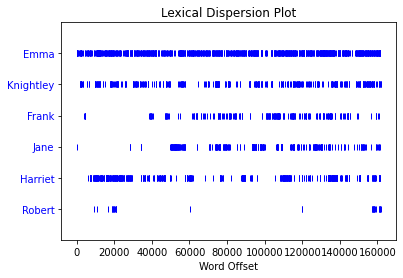

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

# dispersion_plot -> corpus 전체에서 각 단어의 등장 위치를 표시한 것 (x축이 corpus의 시작부터 끝을 나타냄)
# 소설 등장인물로 이런 식으로 하면 누가 주연이고 조연인지 등을 파악 가능할 것

In [ ]:
# similar() 함수

# Distributional similarity:  -> 논항 내의 단어와 분포상으로 비슷한 단어를 나열
# find other words which appear in the same contexts as the specified word; 
# list most similar words first. -> 유사도가 높은 것부터 차례대로 출력
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [ ]:
# Find contexts where the specified words appear; list most frequent common contexts first. -> 가장 빈도가 높은 것부터 차례대로 출력
# specified words (논항 내의 단어들)가 공통적으로 나타내는 contexts를 찾음

nltk.Text(words).common_contexts(["Emma", "she"])


# _가 있는 부분에 Emma와 She가 함께 나타나기 쉽다는 뜻

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


# Frequency distribution, Frequency plot
- text를 다룰 때 가장 중요한 것이 frequency

In [ ]:
fd = nltk.FreqDist(words).most_common(20)
fd

# 어떤 단어들이 가장 자주 나오는지

In [ ]:
nltk.Text(words).plot(20)

# 위와 같은 정보를 plotting 해서 보여줌

#Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


# 다양한 dictionary를 다운받아서 활용하는 것

In [ ]:
len(nltk.corpus.words.words('en'))

# dictionary에 포함된 단어가 몇개인지

# Extract information (pos tag, named entity)

- POS: part of speech -> 품사

###POS tag (품사) list:
- **CC** coordinating conjunction 
- **CD** cardinal digit 
-**DT** determiner 
-**EX** existential there (like: "there is" ... think of it like "there exists") 
- **FW** foreign word 
- **IN** preposition/subordinating conjunction 
- **JJ** adjective 'big' 
- **JJR** adjective, comparative 'bigger'
- **JJS** adjective, superlative 'biggest' 
- **LS** list marker 1) 
- **MD** modal could, will 
- **NN** noun, singular 'desk' 
- **NNS** noun plural 'desks' 
- **NNP** proper noun, singular 'Harrison' 
- **NNPS** proper noun, plural 'Americans' 
- **PDT** predeterminer 'all the kids' 
- **POS** possessive ending parent's 
- **PRP** personal pronoun I, he, she 
- **PRP\$** possessive pronoun my, his, hers 
- **RB** adverb very, silently, 
- **RBR** adverb, comparative better 
- **RBS** adverb, superlative best 
- **RP** particle give up 
- **TO** to go 'to' the store. 
- **UH** interjection errrrrrrrm 
- **VB** verb, base form take 
- **VBD** verb, past tense took 
- **VBG** verb, gerund/present participle taking - VBN verb, past participle taken 
- **VBP** verb, sing. present, non-3d take 
- **VBZ** verb, 3rd person sing. present takes 
- **WDT** wh-determiner which 
- **WP** wh-pronoun who, what 
- **WP\$** possessive wh-pronoun whose 
- **WRB** wh-abverb where, when

In [ ]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
words

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

# words에 담겨 있는 단어들의 품사 정보를 알아보는 것

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
pos

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)

# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity) -> "named entity"

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [ ]:
NE

# Wordcloud
- wordcloud package 사용
- Frequency를 기반으로 함
- 단어의 빈도에 따라 글자의 크기를 달리해서 visualize

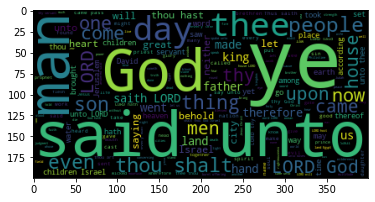

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

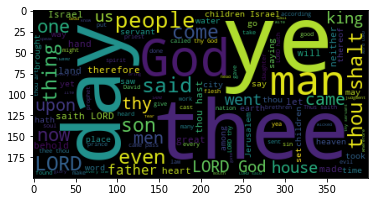

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')                                 # -> stopwords에 직접 추가 가능
wc = WordCloud(stopwords = stopwords).generate(text)  # stopwords를 빼고 plotting 하는 것 (stopwords=stopwords를 하는 건 우리가 unto를 추가했기 때문)
plt.imshow(wc)

# Regular expression
- 어떤 텍스트에 조작을 가하거나 search를 하고싶을 때 규칙을 통해 찾아냄
- nlp 전문가에 대한 수요가 많은데, 그 중심에 있는 것이 regular expression
- 정규표현은 string에 대해서만 적용가능! 즉, 정규표현 함수의 논항에도 문자열만 들어갈 수 있음

In [ ]:
import nltk

In [ ]:
import re

In [ ]:
re.search('a', 'abcdefa')

# 왼쪽부터 검색해서 제일 먼저 검색되는 것만 출력 

<re.Match object; span=(0, 1), match='a'>

In [ ]:
re.findall('a', 'abcdefa')

# 전부 다 찾아서 리스트로 만들어 줌 

['a', 'a']

In [ ]:
re.sub('a', 'b', 'abcdefa')


# substitue

'bbcdefb'

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character    -> \n은 포함 x
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses

\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

# 정규표현 함수의 첫번째 논항에 들어갈 수 있는 규칙들 

####re.search()

In [ ]:
nltk.download('words')
engdict = nltk.corpus.words.words('en')
engdict

In [ ]:
result = [w for w in engdict if re.search('ed$', w)]

# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]

print(result[:10])


# 위의 코드들 다 한번씩 실행하면서 연습해보기

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [ ]:
len(result)

9192

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

# treebank -> 신문(저널)에 나오는 단어들

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]       # -> \.은 문자.을 나타내는 것 (정규표현x)
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))   # -> sort를 해 줌 
print(result[:10])

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything']


####re.findall()

- pattern에 해당하는 것을 다 찾아서 리스트화 함 

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

#freinds 대본
#파일을 현재 작업 서버로 가져옴

0

In [ ]:
# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text

'101. The One Where Monica Gets a New Roommate\n(The Pilot-The Uncut Version)\n\nWritten by: Marta Kauffman & David Crane\nTranscribed by: guineapig\nAdditional transcribing by: Eric Aasen\n(Note: The previously unseen parts of this episode are shown in blue text.)\n\n[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]\nMonica: There\'s nothing to tell! He\'s just some guy I work with!\nJoey: C\'mon, you\'re going out with the guy! There\'s gotta be something wrong with him!\nChandler: All right Joey, be nice.Ê So does he have a hump? A hump and a hairpiece?\nPhoebe: Wait, does he eat chalk?\n(They all stare, bemused.)\nPhoebe: Just, \'cause, I don\'t want her to go through what I went through with Carl- oh!\nMonica: Okay, everybody relax. This is not even a date. It\'s just two people going out to dinner and- not having sex.\nChandler: Sounds like a date to me.\n[Time Lapse]\nChandler: Alright, so I\'m back in high school, I\'m standing in the middle of the cafeteria,

In [ ]:
type(text)

# 정규표현은 string에만 사용 

str

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'                   # [\.|\?|\!] -> . 또는 ? 또는 !
sent = re.findall(pattern, text)
sent
text = '\n'.join(sent)

In [ ]:
text

'The previously unseen parts of this episode are shown in blue text\nCentral Perk, Chandler, Joey, Phoebe, and Monica are there\nThere\'s nothing to tell! He\'s just some guy I work with\nC\'mon, you\'re going out with the guy! There\'s gotta be something wrong with him\nAll right Joey, be nice.Ê So does he have a hump? A hump and a hairpiece\nWait, does he eat chalk\nJust, \'cause, I don\'t want her to go through what I went through with Carl- oh\nOkay, everybody relax. This is not even a date. It\'s just two people going out to dinner and- not having sex\nSounds like a date to me\nAlright, so I\'m back in high school, I\'m standing in the middle of the cafeteria, and I realize I am totally naked\nOh, yeah. Had that dream\nThen I look down, and I realize there\'s a phone... there\nInstead of...\nThat\'s right\nNever had that dream\nNo\nAll of a sudden, the phone starts to ring. Now I don\'t know what to do, everybody starts looking at me\nAnd they weren\'t looking at you before?\nFina

In [ ]:
# write out a text file

file = open("tmp.txt", "w")
file.write(text)
file.close()